<a href="https://colab.research.google.com/github/mehang/Improvised-CNN/blob/master/notebook/Caltech-256-128/resized/15*15/caltech256_15_15_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
!unzip /content/drive/My\ Drive/Mehang\ Rai/caltech-256-image-aspect-preserved-128.zip -d caltech-256-image-aspect-preserved-128

In [4]:
ITERATION = 1
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
RANDOM_SEED = [42,42,34,56,62,74,29,15,7,81][ITERATION-1]
BATCH_SIZE = 32
NUM_CLASSES = 257
EPOCHS = 1000
GABOR_LAYER_INDEX = 0
GABOR_WIDTH = 15
GABOR_HEIGHT = 15
GABOR_SIZE = (GABOR_WIDTH, GABOR_HEIGHT)
NUM_RECEPTIVE_FILTERS = 64
DATA_DIRECTORY = "caltech-256-image-aspect-preserved-128/caltech-256-image-aspect-preserved/"

In [5]:
filenames = os.listdir(DATA_DIRECTORY)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    categories.append(category)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [6]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=RANDOM_SEED)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [7]:
print(train_df.shape)
print(validate_df.shape)

(24485, 2)
(6122, 2)


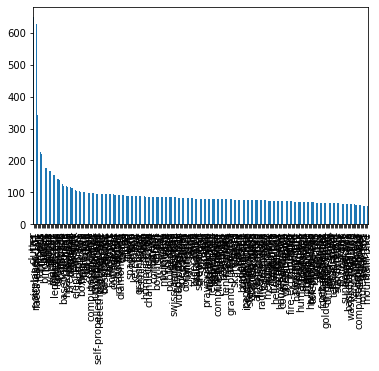

In [8]:
train_df['category'].value_counts().plot.bar()

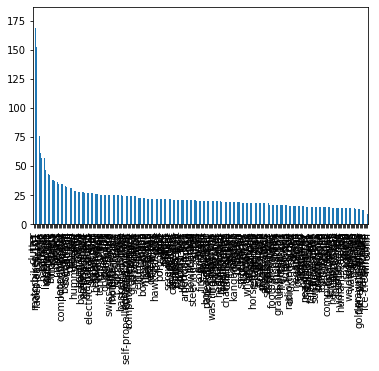

In [9]:
validate_df['category'].value_counts().plot.bar()

In [10]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # fill_mode='nearest',
    rescale=1./255,
)
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    DATA_DIRECTORY, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 24485 validated image filenames belonging to 257 classes.


In [11]:
validation_datagen = ImageDataGenerator(
    # fill_mode='nearest',
    rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    DATA_DIRECTORY, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 6122 validated image filenames belonging to 257 classes.


In [12]:
train_generator.image_shape

(128, 128, 3)

In [13]:
NUM_CLASSES = len(train_df['category'].value_counts())
print(NUM_CLASSES)

257


In [14]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# classifier = None
# classifier = Sequential([
#     layers.Conv2D(NUM_RECEPTIVE_FILTERS, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dense(512),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# classifier = None
# classifier = Sequential([
#     layers.Conv2D(NUM_RECEPTIVE_FILTERS, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.01),
#     layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.01),
#     layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.01),
#     layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dropout(0.01),
#     layers.Dense(512),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# classifier = None
# classifier = Sequential([
#     layers.Conv2D(NUM_RECEPTIVE_FILTERS, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dropout(0.1),
#     layers.Dense(512),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# classifier = None
# classifier = Sequential([
#     layers.Conv2D(NUM_RECEPTIVE_FILTERS, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=train_generator.image_shape),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     Conv2D(32, (3, 3), activation='relu', padding='same'),
#         layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#         layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.1),
#     layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dropout(0.1),
#     layers.Dense(512),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.1),
#     layers.Dense(512),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dense(NUM_CLASSES, activation='softmax')
# ])

classifier = None
classifier = Sequential([
    layers.Conv2D(64, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=train_generator.image_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.1),
    layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


# classifier = None
# classifier = Sequential([
#     Conv2D(64, (3, 3), input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3), padding='same',
#            activation='relu'),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     Conv2D(128, (3, 3), activation='relu', padding='same',),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(256, (3, 3), activation='relu', padding='same',),
#     Conv2D(256, (3, 3), activation='relu', padding='same',),
#     Conv2D(256, (3, 3), activation='relu', padding='same',),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     Conv2D(512, (3, 3), activation='relu', padding='same',),
#     MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
#     Flatten(),
#     Dense(4096, activation='relu'),
#     Dense(4096, activation='relu'),
#     Dense(NUM_CLASSES, activation='softmax')
# ])


# classifier = None
# classifier = Sequential([
#     layers.Conv2D(64, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=train_generator.image_shape),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#         layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Dropout(0.1),
#     layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#         layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.1),
#     layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#         layers.Dropout(0.1),
#     layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#         layers.Conv2D(512, kernel_size=(3,3), padding='same', strides=(1,1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dropout(0.1),
#     layers.Dense(4096),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.1),
#     layers.Dense(4096),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dense(NUM_CLASSES, activation='softmax')
# ])

classifier = None
classifier = Sequential([
    layers.Conv2D(NUM_RECEPTIVE_FILTERS, kernel_size=GABOR_SIZE, strides=(1,1), padding='same', input_shape=train_generator.image_shape),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(128, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
        layers.Conv2D(256, kernel_size=(3,3), padding='same', strides=(1,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.1),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

classifier.summary()

import copy
untrained_layers = copy.deepcopy(classifier.get_layer(name=classifier.layers[GABOR_LAYER_INDEX].name).get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 64)      43264     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
activation_15 (Activation)   (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 32)      18464     
_________________________________________________________________
batch_normalization_16 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)       

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)
stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)
callbacks = [stop_alg, reduce_lr]
opt = Adam(learning_rate=0.001)
classifier.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', 'AUC'])

start = time.perf_counter()
hist = classifier.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,
    callbacks=callbacks
)
finish = time.perf_counter()

Epoch 1/1000
765/765 [==============================] - 112s 139ms/step - loss: 5.4443 - accuracy: 0.0512 - auc: 0.6104 - val_loss: 6.1742 - val_accuracy: 0.0785 - val_auc: 0.6171
Epoch 2/1000
765/765 [==============================] - 106s 138ms/step - loss: 4.8788 - accuracy: 0.0870 - auc: 0.7109 - val_loss: 5.5531 - val_accuracy: 0.0700 - val_auc: 0.6643
Epoch 3/1000
765/765 [==============================] - 106s 138ms/step - loss: 4.6361 - accuracy: 0.1065 - auc: 0.7541 - val_loss: 5.1912 - val_accuracy: 0.1041 - val_auc: 0.7047
Epoch 4/1000
765/765 [==============================] - 105s 137ms/step - loss: 4.4066 - accuracy: 0.1291 - auc: 0.7848 - val_loss: 4.3150 - val_accuracy: 0.1527 - val_auc: 0.7987
Epoch 5/1000
765/765 [==============================] - 107s 140ms/step - loss: 4.2465 - accuracy: 0.1501 - auc: 0.8043 - val_loss: 5.2748 - val_accuracy: 0.1150 - val_auc: 0.7037
Epoch 6/1000
765/765 [==============================] - 107s 139ms/step - loss: 4.0574 - accuracy: 0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)
stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)
callbacks = [stop_alg, reduce_lr]
opt = Adam(learning_rate=0.001)
classifier.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', 'AUC'])

start = time.perf_counter()
hist = classifier.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,
    callbacks=callbacks
)
finish = time.perf_counter()

Epoch 1/1000
765/765 [==============================] - 134s 173ms/step - loss: 5.4380 - accuracy: 0.0528 - auc: 0.6106 - val_loss: 5.7412 - val_accuracy: 0.0556 - val_auc: 0.6397
Epoch 2/1000
765/765 [==============================] - 132s 173ms/step - loss: 4.9401 - accuracy: 0.0841 - auc: 0.7014 - val_loss: 4.9938 - val_accuracy: 0.0934 - val_auc: 0.7064
Epoch 3/1000
765/765 [==============================] - 133s 173ms/step - loss: 4.6561 - accuracy: 0.1093 - auc: 0.7472 - val_loss: 4.8375 - val_accuracy: 0.1014 - val_auc: 0.7280
Epoch 4/1000
765/765 [==============================] - 133s 173ms/step - loss: 4.4621 - accuracy: 0.1270 - auc: 0.7778 - val_loss: 4.4879 - val_accuracy: 0.1376 - val_auc: 0.7709
Epoch 5/1000
765/765 [==============================] - 132s 173ms/step - loss: 4.2537 - accuracy: 0.1534 - auc: 0.8040 - val_loss: 4.2119 - val_accuracy: 0.1612 - val_auc: 0.8047
Epoch 6/1000
765/765 [==============================] - 132s 172ms/step - loss: 4.0780 - accuracy: 0

In [ ]:
print("Start time = {}".format(start))
print("Finish time = {}".format(finish))
print("Training time = {}".format(finish-start))
hist.history['start_time'] = start
hist.history['finish_time'] = finish
hist.history['train_time'] = finish-start

Start time = 595.349049413
Finish time = 6954.74857218
Training time = 6359.399522767


In [ ]:
import pickle

trained_layers = copy.deepcopy(classifier.get_layer(name=classifier.layers[GABOR_LAYER_INDEX].name).get_weights())
hist.history['untrained_layers'] = untrained_layers
hist.history['trained_layers'] = trained_layers

with open('caltech256-{}-history-kernel-{}.p'.format(ITERATION, GABOR_WIDTH),'wb') as fp:
    pickle.dump(hist.history, fp, protocol=pickle.HIGHEST_PROTOCOL)

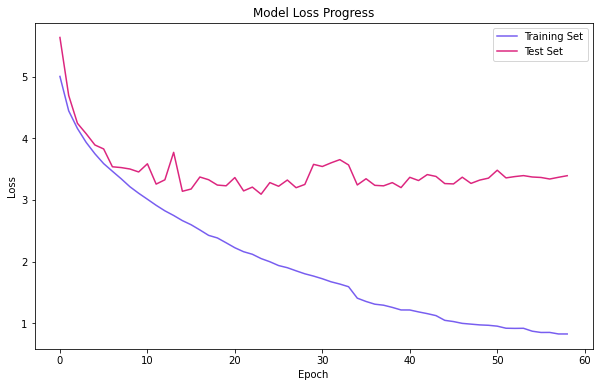

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('caltech256-{}-loss-kernel-{}.png'.format(ITERATION,GABOR_WIDTH), dpi=350, bbox_inches='tight')
plt.show()

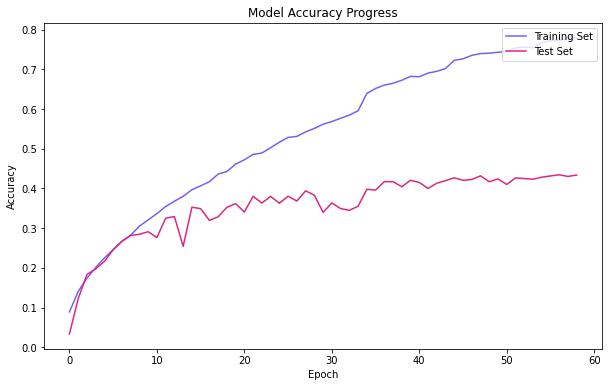

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], color='#785ef0')
plt.plot(hist.history['val_accuracy'], color='#dc267f')
plt.title('Model Accuracy Progress')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('caltech256-{}-accuracy-kernel-{}.png'.format(ITERATION, GABOR_WIDTH), dpi=350, bbox_inches='tight')
plt.show()

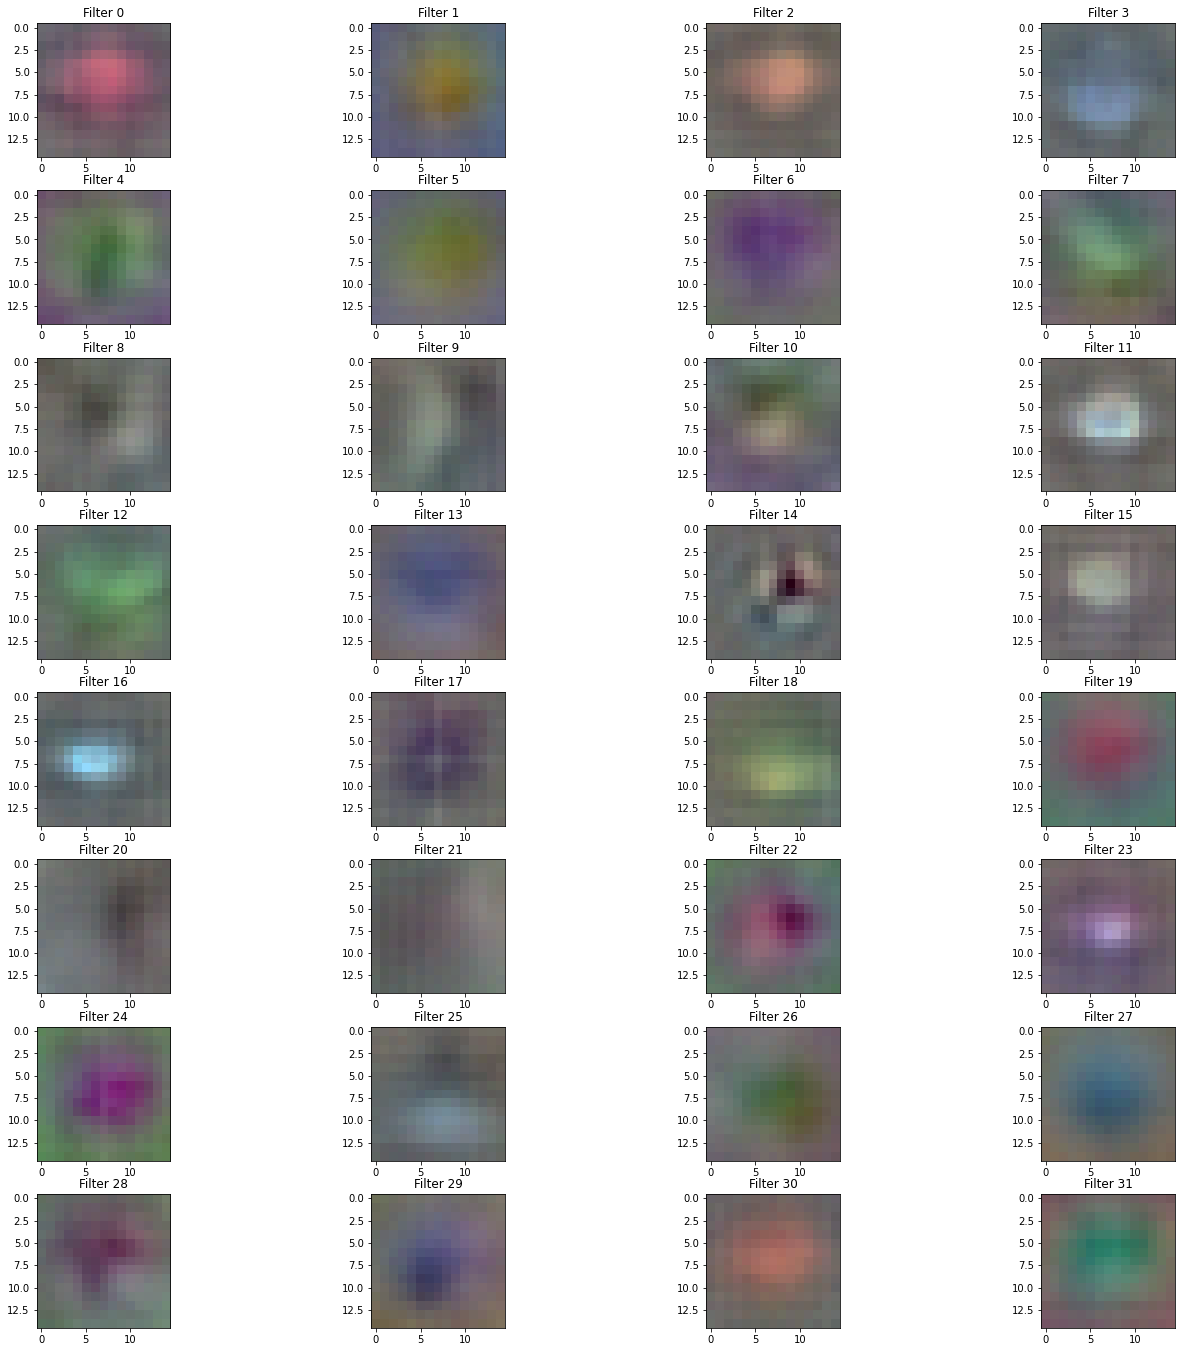

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[GABOR_LAYER_INDEX].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

fig, axs = plt.subplots(8,NUM_RECEPTIVE_FILTERS//8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (GABOR_WIDTH,GABOR_HEIGHT,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("caltech256-{}-filters-kernel-{}.png".format(ITERATION,GABOR_WIDTH), bbox_inches='tight', dpi=350)

-0.9298137 1.3651747


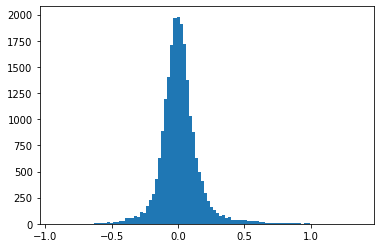

In [ ]:
cnnl1 = classifier.layers[GABOR_LAYER_INDEX].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))

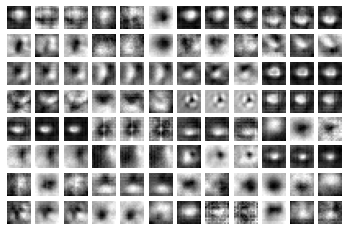

In [ ]:
filter_layers = []
for i in range(NUM_RECEPTIVE_FILTERS):
    for j in range(3):
        filter_layers.append(np.reshape(W[:,:,j, i], GABOR_SIZE))
for i,gf in enumerate(filter_layers):
    plt.subplot(8, (W.shape[3]*3)//8, i+1)
    plt.imshow(gf, cmap='gray')
    plt.axis('off')
plt.savefig("caltech256-{}-channelwise-filters-kernel-{}.png".format(ITERATION,GABOR_WIDTH), bbox_inches='tight', dpi=350)

In [ ]:
!cp caltech256-1-history-kernel-15.p /content/drive/My\ Drive/Mehang\ Rai/analysis/caltech-256-aspect-preserved-new-config-128/1/

In [ ]:
!cp caltech256-1-loss-kernel-15.png /content/drive/My\ Drive/Mehang\ Rai/analysis/caltech-256-aspect-preserved-new-config-128/1/

In [ ]:
!cp caltech256-1-accuracy-kernel-15.png /content/drive/My\ Drive/Mehang\ Rai/analysis/caltech-256-aspect-preserved-new-config-128/1/

In [ ]:
!cp caltech256-1-filters-kernel-15.png /content/drive/My\ Drive/Mehang\ Rai/analysis/caltech-256-aspect-preserved-new-config-128/1/

In [ ]:
!cp caltech256-1-channelwise-filters-kernel-15.png /content/drive/My\ Drive/Mehang\ Rai/analysis/caltech-256-aspect-preserved-new-config-128/1/